## 3. 음향 모델

음성인식에서 음성 데이터의 특징을 추출하는 데 사용되는 모델
음성 데이터를 시간에 따라 숨겨진 상태로 모델링하고, 이 상태를 사용하여 음성의 특징 추출

음향 모델 구성 요소

초기 상태 분포 - 음성 인식 시작 부분에서 음성 상태가 어떤 것일지 확률적으로 나타내는 분포

상태 전이 확률 - 한 상태에서 다음 상태로 전이할 확률을 나타내는 행렬

관측 확률  - 각 상태에서 관측될 수 있는 음성 신호의 확률을 나타내는 행렬


음향 모델 종류
HMM( Hidden Markov Model )
GMM( Gaussian Mixture Model )
GMM-HMM
DNN-HMM


#GMM(Gussian Mixture Model)

M개의 정규분포 가중합의 데이터를 표현하는 확률 모델
데이터가 정규분포를 따르지 않거나 그 분포가 복잡한 모양일 경우 GMM 사용
GMM의 파라미터는 각 정규분포의 평균과 공분산, 가중치 사용







## GMM

﻿
한줄 결론부터 : 여러 분포를 이루는 데이터들로 이루어진 최종 데이터가 있다.

이 데이터들에 대하여 하나의 정규분포를 이루는 모델을 만드는 것이 아닌 여러가지 분포를 가정하여 각 분포에 대한 최대우도를 나타낼

﻿

In [1]:
from sklearn.mixture import GaussianMixture

In [2]:
import random

import os
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf
import librosa
import librosa.display
import random

import IPython.display as idp

# 푸리에 변환을 위한 라이브러리
import math
from scipy.interpolate import splrep, splev

In [3]:
np.random.seed(0)
data1 = np.random.normal(loc = 5, scale=1, size=100)
data2 = np.random.normal(loc=10, scale=2, size=150)
data =np.concatenate((data1,data2))

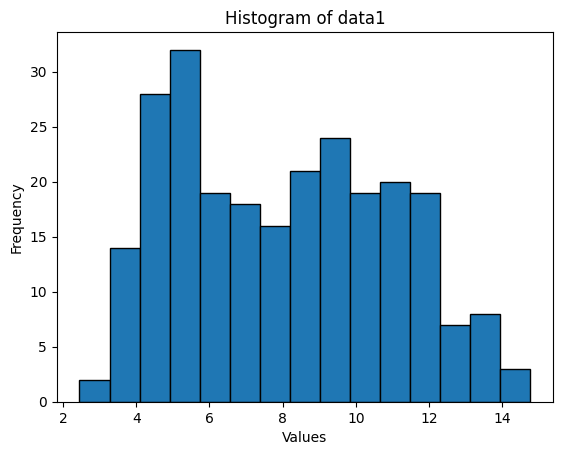

In [5]:
# Creating a histogram
plt.hist(data, bins=15, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of data1')

# Display the plot
plt.show()

In [6]:
#GMM에 맞게 데이터 차원 변환
data = data.reshape(-1,1)


In [8]:
#GMM 객체 생성 및 학습
n_components =2
gmm = GaussianMixture(n_components= n_components,random_state=0)
gmm.fit(data)

GaussianMixture(n_components=2, random_state=0)

In [9]:
x = np.linspace(data.min(), data.max(), 1000)
x= x.reshape(-1,1)
y=np.exp(gmm.score_samples(x))

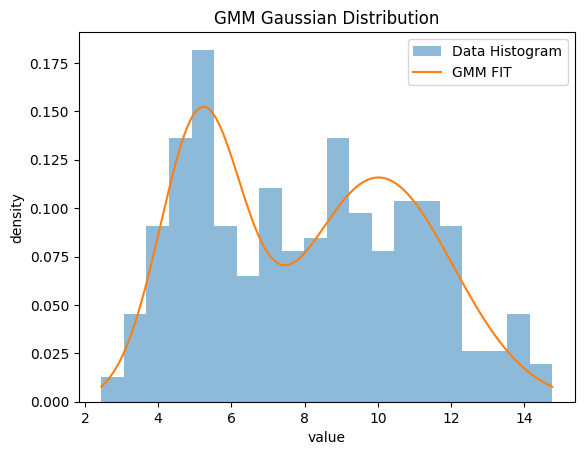

In [10]:
plt.hist(data,bins=20, density=True, alpha=0.5, label='Data Histogram')
plt.plot(x,y,label="GMM FIT")
plt.xlabel('value')
plt.ylabel('density')
plt.title("GMM Gaussian Distribution")
plt.legend()
plt.show()

# GMM -가우시안 성분


In [11]:
import warnings

warnings.filterwarnings('ignore')

In [12]:
data3 = np.random.normal(loc =15, scale=1.5, size=120)
data = np.concatenate((data1,data2,data3))

data = data.reshape(-1,1)


In [13]:
n_components =3 
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(data)

GaussianMixture(n_components=3, random_state=0)

In [20]:
x= np.linspace(data.min(),data.max(),1000)
x= x.reshape(-1,1)
y=np.exp(gmm.score_samples(x))

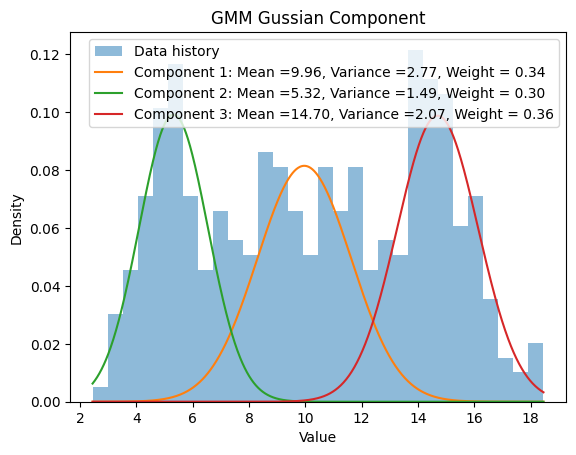

In [24]:
plt.hist( data, bins=30, density=True, alpha=0.5, label= 'Data history')
for i in range(n_components):
    mean =gmm.means_[i][0]
    variance =gmm.covariances_[i][0][0]
    weight=gmm.weights_[i]
    component = weight*np.exp(-(x-mean)**2/ (2*variance)) / np.sqrt(2*np.pi*variance)
    plt.plot(x, component, label=f'Component {i+1}: Mean ={mean:.2f}, Variance ={variance:.2f}, Weight = {weight:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('GMM Gussian Component')
plt.legend()
plt.show()
    

# GMM 가중치

In [25]:
weights =[0.4,0.3,0.3]
gmm = GaussianMixture(n_components=n_components, weights_init=weights, random_state=0)
gmm.fit(data)

GaussianMixture(n_components=3, random_state=0,
                weights_init=array([0.4, 0.3, 0.3]))

In [26]:
y= np.exp(gmm.score_samples(x))

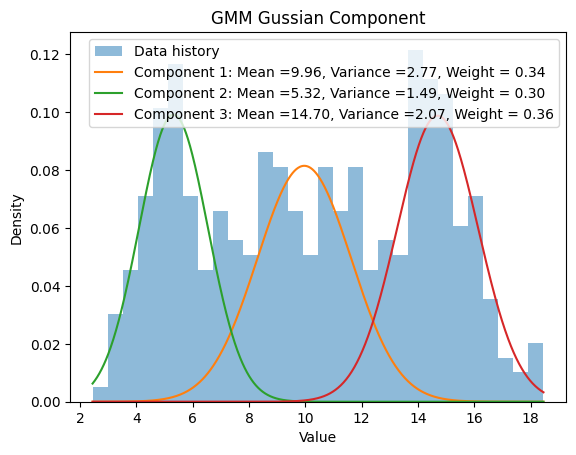

In [27]:
plt.hist( data, bins=30, density=True, alpha=0.5, label= 'Data history')
for i in range(n_components):
    mean =gmm.means_[i][0]
    variance =gmm.covariances_[i][0][0]
    weight=gmm.weights_[i]
    component = weight*np.exp(-(x-mean)**2/ (2*variance)) / np.sqrt(2*np.pi*variance)
    plt.plot(x, component, label=f'Component {i+1}: Mean ={mean:.2f}, Variance ={variance:.2f}, Weight = {weight:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('GMM Gussian Component')
plt.legend()
plt.show()

## GMM EM Algorithm

EM 알고리즘은 Expectation-Maximization의 약자인데,

여기서 Expectation은 로그 가능도의 기댓값을 계산하는 과정이다 라고 하는데, 그냥 라벨을 찾는 과정이라고 보면 좋을 것 같고

Maximization은 Maximum Likelihood Estimation을 수행해서 모수를 추정하는 과정이라고 볼 수 있다.

즉, E-step에서는 “변수의 정보(즉, 이 변수의 라벨은?)”를 업데이트 하고, M-step에서는 “변수들이 어떻게 분포 되어 있는지에 대한 가설”을 업데이트하는 과정이라고 봐도 좋을 것 같다.

In [28]:
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 =np. random.normal(loc=10, scale=2, size=150)
data = np.concatenate((data1,data2))

data = data.reshape(-1,1)

In [31]:
def em_algorithm(data, n_components, n_iterations=100):
    n_samples, n_features= data.shape
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data)
    
    for _ in range(n_iterations):
        responsibilities =gmm.predict_proba(data) # 각 가우시안 분포에 속할 확률을 반환
        #print(responsibilities)
        
        total_weight = np.sum(responsibilities,axis=0)
        gmm.weights_=total_weight/n_samples
        gmm.means_=np.dot(responsibilities.T, data)/ total_weight[:, np.newaxis]
        gmm.covariances_=np.array([np.dot((data-gmm.means_[i]).T,
                                          (data -gmm.means_[i])*
                                          responsibilities[:,i])
                                   / total_weight[i] for i in range(n_components)])
        
    return gmm

In [32]:
n_components =2
estimated_gmm =em_algorithm(data, n_components)

[[3.80556667e-01 6.19443333e-01]
 [5.87539292e-02 9.41246071e-01]
 [1.26764682e-01 8.73235318e-01]
 [6.35475427e-01 3.64524573e-01]
 [4.32535224e-01 5.67464776e-01]
 [1.73675254e-02 9.82632475e-01]
 [1.21742186e-01 8.78257814e-01]
 [3.21262796e-02 9.67873720e-01]
 [3.36659390e-02 9.66334061e-01]
 [5.95097211e-02 9.40490279e-01]
 [4.35995105e-02 9.56400490e-01]
 [2.50275508e-01 7.49724492e-01]
 [9.37038214e-02 9.06296179e-01]
 [4.25394869e-02 9.57460513e-01]
 [6.20021690e-02 9.37997831e-01]
 [5.42216894e-02 9.45778311e-01]
 [2.64687185e-01 7.35312815e-01]
 [3.05310587e-02 9.69468941e-01]
 [5.29100695e-02 9.47089931e-01]
 [1.86029583e-02 9.81397042e-01]
 [1.49484766e-02 9.85051523e-01]
 [8.11379758e-02 9.18862024e-01]
 [1.08000776e-01 8.91999224e-01]
 [1.99422553e-02 9.80057745e-01]
 [6.50890431e-01 3.49109569e-01]
 [1.43832451e-02 9.85616755e-01]
 [3.92005194e-02 9.60799481e-01]
 [3.10499087e-02 9.68950091e-01]
 [2.79367317e-01 7.20632683e-01]
 [2.55655381e-01 7.44344619e-01]
 [4.412957

In [33]:
x= np.linspace(data.min(),data.max(),1000)
x= x.reshape(-1,1)
y=np.exp(estimated_gmm.score_samples(x))

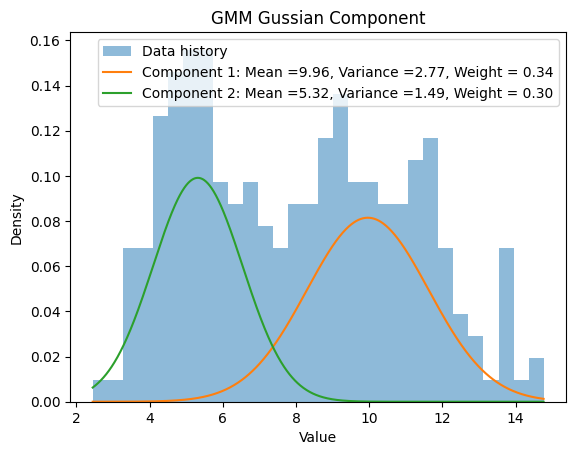

In [36]:
plt.hist( data, bins=30, density=True, alpha=0.5, label= 'Data history')
for i in range(n_components):
    mean =gmm.means_[i][0]
    variance =gmm.covariances_[i][0][0]
    weight=gmm.weights_[i]
    component = weight*np.exp(-(x-mean)**2/ (2*variance)) / np.sqrt(2*np.pi*variance)
    plt.plot(x, component, label=f'Component {i+1}: Mean ={mean:.2f}, Variance ={variance:.2f}, Weight = {weight:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('GMM Gussian Component')
plt.legend()
plt.show()

# GMM

In [37]:
np.random.seed(0)
n_samples = 100
n_features = 13 # 음향 특성
phoneme_a =np.random.randn(n_samples, n_features)+3
phoneme_e =np.random.randn(n_samples, n_features)-3
phoneme_i =np.random.randn(n_samples, n_features)

In [38]:
acoustic_features =np.vstack((phoneme_a,phoneme_e,phoneme_i))

acoustic_features =acoustic_features.reshape(-1, n_features)

In [39]:
n_components = 3
gmm =GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(acoustic_features)

GaussianMixture(n_components=3, random_state=0)

In [40]:
n_new_samples = 5
new_samples, _ = gmm.sample(n_samples=n_new_samples)

In [42]:
print(new_samples)

[[-3.04336279 -2.98932848 -4.77752534 -3.12613924 -2.41933131 -1.90588675
  -1.60162398 -3.20755657 -2.04262303 -3.02158218 -4.84340869 -0.92499904
  -4.14726796]
 [-3.33567724 -2.17378243 -3.83548379 -3.33400358 -1.82383568 -1.77276137
  -2.50025016 -2.41451467 -1.22681695 -2.7278158  -4.96555783 -3.95229401
  -1.06777829]
 [ 1.88601426  3.17364798  2.81963237  3.2997192   3.17262304  3.44248419
   3.96953872  3.2156091   5.40818541  1.91387642  4.50826069  4.34142641
   2.94363265]
 [ 1.1313992   2.53786611  1.32947029  2.34497135  3.07356149  3.38740322
   3.39150776  3.81197336  0.9768469   3.55529192  3.13532667  0.95474098
   4.57368612]
 [ 0.35323161 -0.69133927  0.35221113  0.57385885  0.32739382 -1.16994975
   0.0925326  -0.97293159 -1.0921103   0.0736467  -0.09909163 -0.03278697
  -0.7999345 ]]


In [ ]:
()